<a href="https://colab.research.google.com/github/MayankJaideep/skillcarft-task3/blob/main/skillcraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.8928176795580111

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       807
           1       0.52      0.14      0.22        98

    accuracy                           0.89       905
   macro avg       0.71      0.56      0.58       905
weighted avg       0.86      0.89      0.86       905


Confusion Matrix:
 [[794  13]
 [ 84  14]]


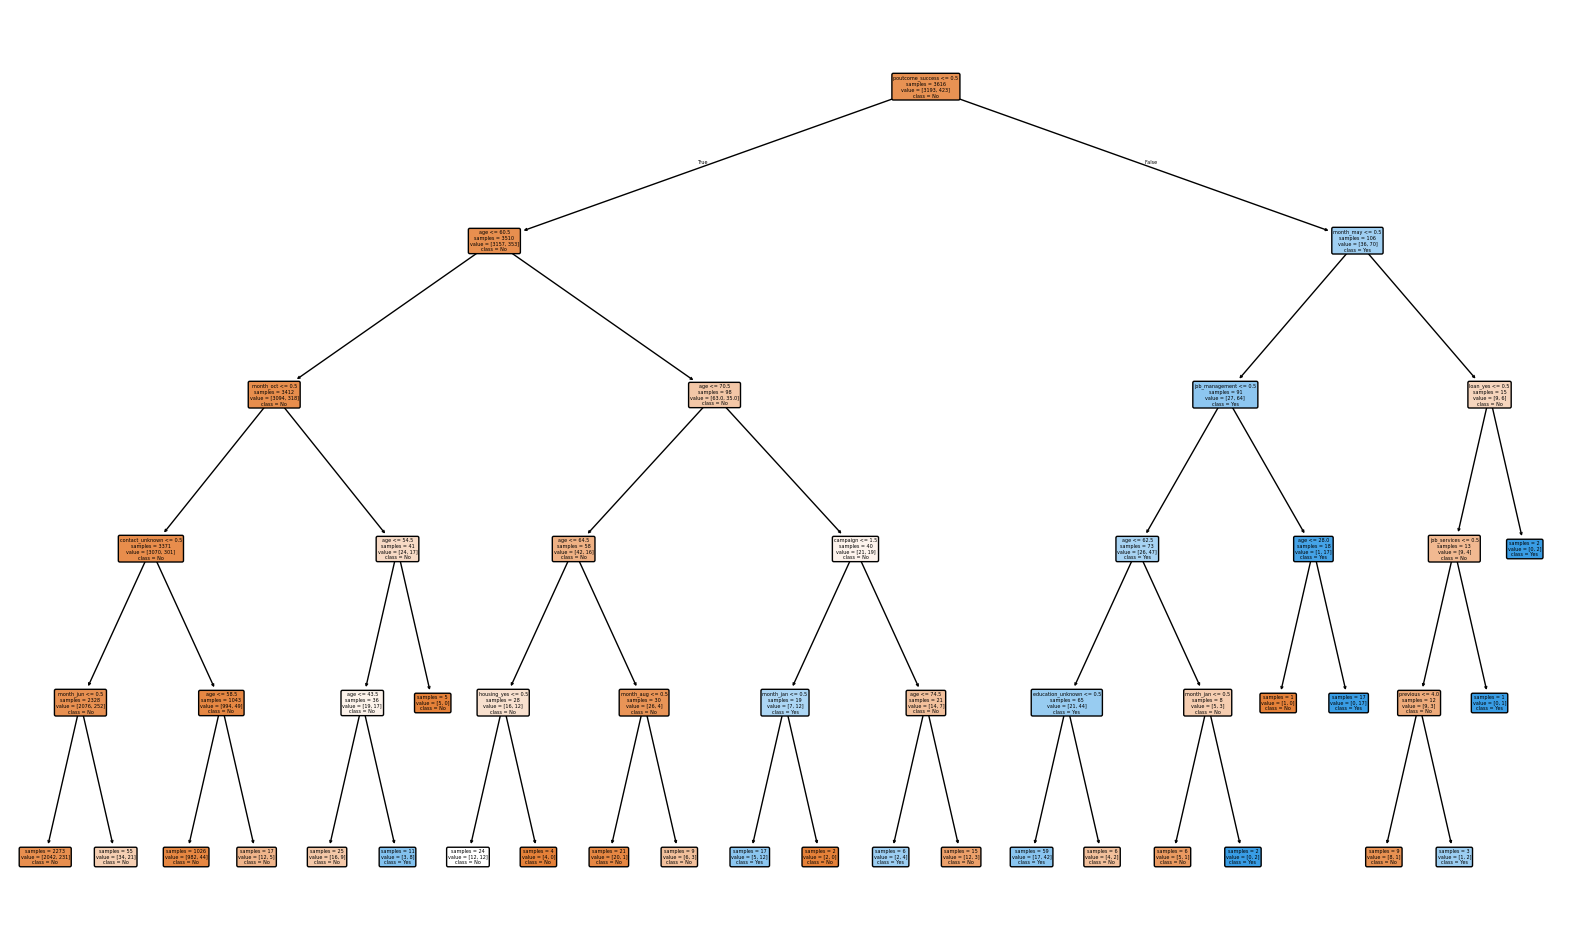

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("bank.csv", delimiter=';')

# Selecting relevant demographic and behavioral features
demographic_features = ['age', 'marital', 'education', 'job']
behavioral_features = ['housing', 'loan', 'contact', 'month', 'campaign', 'previous', 'poutcome']
selected_features = demographic_features + behavioral_features + ['y']
df = df[selected_features]

# Encode categorical features
df = pd.get_dummies(df, columns=['marital', 'education', 'job', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Split data into features and target
X = df.drop(columns=['y'])
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize decision tree with circles and numbered nodes
plt.figure(figsize=(20, 12))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True, impurity=False)
plt.show()
